<br>
<div class="alert alert-info">
<b> Section.</b>
</div>

## 1. Classifying Breast Cancer using  k-Nearest Neighbors Classifier(KNN)

#### Learning outcomes:
* Understand what KNN is trying to solve
* Understand how KNN works and its downsides

#### Overview of KNN
Machine learning algorithms can be grouped into *parametric* and *nonparametric models.*
* parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. 
* nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of nonparametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM.

KNN belongs to a subcategory of nonparametric models that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:

1. Choose the number of k and a distance metric.
2. Find the k nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote.
Based on the chosen distance metric, the KNN algorithm finds the k samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its k nearest neighbors.

#### Advantage
The main advantage of such a memory-based approach is that the classifier immediately adapts as we collect new training data

#### Disadvantage
computational complexity for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario—unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures such as KD-trees



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#list(cancer_data.target_names) 

In [2]:
# Get predictors
print("Target names: {}".format(cancer_data['target_names']))
#list(data.feature_names)

Target names: ['malignant' 'benign']


In [3]:
print("Feature names: {}".format(cancer_data['feature_names']))
#list(data.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("Type of data: {}".format(type(cancer_data['data'])))

Type of data: <type 'numpy.ndarray'>


In [5]:
#check if all data has been successfully loaded
print("Shape of data: {}".format(cancer_data['data'].shape))

Shape of data: (569, 30)


In [6]:
#Check all data has been successfully loaded (array shape):
print("First two columns of data:\n{}".format(cancer_data['data'][:2]))

First two columns of data:
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
    2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
    1.23800000e-01   1.866

In [7]:
print("Type of target: {}".format(type(cancer_data['target'])))

Type of target: <type 'numpy.ndarray'>


In [8]:
print("Shape of target: {}".format(cancer_data['target'].shape))


Shape of target: (569,)


In [9]:
print("Target:\n{}".format(cancer_data['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 

## Pre-Processing


In [10]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], test_size=0.25,
                                                    random_state=0)
#Check
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [11]:
## Create an KNN classifier and train it on 75% of the data set.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
#class sklearn.cross_validation.KFold(n, n_folds=3, shuffle=False, random_state=None)[source]

# Analyze accuracy of predictions on 25% of the holdout test sample.
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring =  'accuracy'

neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,26]
param_grid = dict(n_neighbors=neighbors)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = KNeighborsClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle = True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for params, mean_score, scores in grid_result.grid_scores_:
 print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best: 0.969484 using {'n_neighbors': 5}
0.936434 (0.035407) with: {'n_neighbors': 1}
0.957641 (0.023289) with: {'n_neighbors': 3}
0.969491 (0.018203) with: {'n_neighbors': 5}
0.967110 (0.018720) with: {'n_neighbors': 7}
0.967165 (0.023719) with: {'n_neighbors': 9}
0.960078 (0.021127) with: {'n_neighbors': 11}
0.957752 (0.022928) with: {'n_neighbors': 13}
0.957752 (0.022928) with: {'n_neighbors': 15}
0.960078 (0.021127) with: {'n_neighbors': 17}
0.955482 (0.026349) with: {'n_neighbors': 19}
0.955482 (0.019229) with: {'n_neighbors': 21}
0.953156 (0.023149) with: {'n_neighbors': 23}
0.950831 (0.026290) with: {'n_neighbors': 25}
0.953212 (0.027378) with: {'n_neighbors': 26}


TypeError: float() argument must be a string or a number

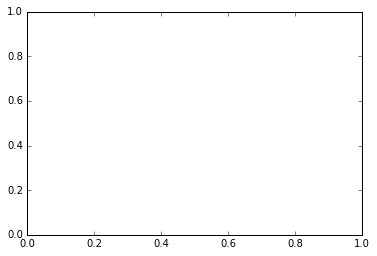

In [13]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
#plt.plot(x_axis, y_axis)
plt.plot( param_grid)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

 * NearestNeighbors implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: 
 * BallTree, KDTree, and a brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data. 

In [ ]:
import numpy as np
BCgraph = knn.kneighbors_graph(X_train).toarray()
print BCgraph
print sum(BCgraph[0]) #5 neighbors
print sum(BCgraph[1])

In [ ]:
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

#Plot heatmap of sparce 
fig, ax = plt.subplots()
heatmap = ax.pcolor(BCgraph, cmap=plt.cm.Blues)
plt.show()

 Our dataset is structured such that points nearby in index order are nearby in parameter space, leading to an approximately block-diagonal matrix of K-nearest neighbors.



## Analyzing KNeighborsClassifier

In [ ]:
from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
neighbors = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
#plt.plot(x_axis, y_axis)
plt.plot(neighbors, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 26.
neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
# build the model
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)
    
# record training set accuracy
training_accuracy.append(clf.score(X_train, y_train))
    
# record generalization accuracy
test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Testing Accuracy")
plt.xlabel("Value of n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. 

* Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. 

* The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. 

* On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

## Tunning KNN Classifier

In [ ]:
#tunning knn
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring =  'accuracy'

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,26]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
 print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(20,10))
probas_ = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

In [ ]:
#summary
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

## Classification using Support Vector Machines (SVM)